Name: Aman Sharda
Register No: 20BAI1180

In [79]:
import numpy as np
import pandas as pd

In [80]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [81]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
workclass=le.fit_transform(df['workclass'])
education=le.fit_transform(df['education'])
marital_status=le.fit_transform(df['marital-status'])
occupation=le.fit_transform(df['occupation'])
relationship=le.fit_transform(df['relationship'])
race=le.fit_transform(df['education'])
gender=le.fit_transform(df['gender'])
native_country=le.fit_transform(df['native-country'])
income=le.fit_transform(df['income'])

In [83]:
df.drop("workclass",axis=1,inplace=True)
df.drop("education",axis=1,inplace=True)
df.drop("marital-status",axis=1,inplace=True)
df.drop("occupation",axis=1,inplace=True)
df.drop("relationship",axis=1,inplace=True)
df.drop("race",axis=1,inplace=True)
df.drop("gender",axis=1,inplace=True)
df.drop("native-country",axis=1,inplace=True)
df.drop("income",axis=1,inplace=True)

In [84]:
df["workclass"]=workclass
df["education"]=education
df["marital_status"]=marital_status
df["occupation"]=occupation
df["relationship"]=relationship
df["race"]=race
df["gender"]=gender
df["native_country"]=native_country
df["income"]=income

In [85]:
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income
0,25,226802,7,0,0,40,4,1,4,7,3,1,1,39,0
1,38,89814,9,0,0,50,4,11,2,5,0,11,1,39,0
2,28,336951,12,0,0,40,2,7,2,11,0,7,1,39,1
3,44,160323,10,7688,0,40,4,15,2,7,0,15,1,39,1
4,18,103497,10,0,0,30,0,15,4,0,3,15,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,4,7,2,13,5,7,0,39,0
48838,40,154374,9,0,0,40,4,11,2,7,0,11,1,39,1
48839,58,151910,9,0,0,40,4,11,6,1,4,11,0,39,0
48840,22,201490,9,0,0,20,4,11,4,1,3,11,1,39,0


In [86]:
from sklearn.preprocessing import MinMaxScaler
x=df.drop('income',axis=1).values
y=df['income']
scaler=MinMaxScaler()
x=df.drop('income',axis=1).values
y=df['income']
scaler = MinMaxScaler()
scaler.fit(x)


MinMaxScaler()

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

In [93]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [94]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 2880092077141419767086710784.00000000
Iteration 2, loss = 3187524253067190213091000320.00000000
Iteration 3, loss = 3187518216066038588095070208.00000000
Iteration 4, loss = 3187512177266817665045889024.00000000
Iteration 5, loss = 3187506138479038809751158784.00000000
Iteration 6, loss = 3187500099702698723675996160.00000000
Iteration 7, loss = 3187494060937797956576215040.00000000
Iteration 8, loss = 3187488022184340356742512640.00000000
Iteration 9, loss = 3187481983442319876860936192.00000000
Iteration 10, loss = 3187475944711740914977996800.00000000
Iteration 11, loss = 3187469905992604020849508352.00000000
Iteration 12, loss = 3187463867284904796428959744.00000000
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


In [95]:
accuracy_score(y_test, y_pred)

0.7579231840144133

In [96]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[9249,    0],
       [2956,    6]])

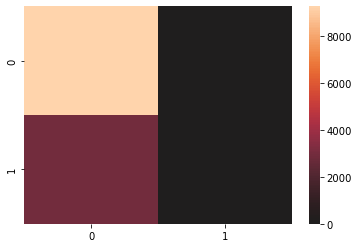

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, center=True)
plt.show()